In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import pandas as pd

df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [46]:
df.isnull().sum()   #checking for null values are situated or not

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [47]:
df.dropna(inplace=True) #null values removed


In [48]:
# checking for duplicate values
df.duplicated().sum()

np.int64(25324)

In [49]:
df.drop_duplicates(inplace=True)  #duplicate values removed
df.head()


,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [50]:
#cat columns----------num col
cat_col=df.select_dtypes(include='object')
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [51]:
# 
cat_col = df.select_dtypes(include='object').drop(["bike_name", "city"], axis=1)

In [52]:
num_col=df.select_dtypes(exclude='object')   #selecting numerical columns
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [53]:
#cat---numerical  two method
##label encoding
## one hot encoding

In [54]:
pd.get_dummies(cat_col).astype(int).head()

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
## label encoding---khud numbers de sakte h
cat_col['owner'].value_counts()

owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [56]:
dt={
    "First Owner":1,        
    "Second Owner":2,
    "Third Owner":3,
    "Fourth & Above Owner":4
}

In [57]:
cat_col['owner']=cat_col['owner'].map(dt)  

In [58]:
cat_col.head()

,owner,brand
0,1.0,TVS
1,1.0,Royal Enfield
2,1.0,Triumph
3,1.0,TVS
4,1.0,Yamaha


In [59]:
cat_col['brand'].value_counts()

brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [61]:
{i:key for key , i in enumerate(list(cat_col['brand'].unique()))}  #converting all brand names into numbers

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [89]:
dt1 = {i: key for key, i in enumerate(list(cat_col['brand'].unique()))}
cat_col['brand'] = cat_col["brand"].map(dt1)  # mapping brand names to numbers


In [90]:
cat_col.head()

,owner,brand
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,0
4,1.0,3


In [91]:
final_df=pd.concat([cat_col,num_col],axis=1)  #concatenating cat and num col
final_df.head()

,owner,brand,price,kms_driven,age,power
0,1.0,0,35000.0,17654.0,3.0,110.0
1,1.0,1,119900.0,11000.0,4.0,350.0
2,1.0,2,600000.0,110.0,8.0,675.0
3,1.0,0,65000.0,16329.0,4.0,180.0
4,1.0,3,80000.0,10000.0,3.0,150.0


In [92]:
#pip install scikit-learn
# model
matrix = final_df.corr()  #correlation matrix
matrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.013768,-0.003305,0.063422,0.189560,0.042835
brand,0.013768,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.003305,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.063422,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.189560,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.042835,0.068647,0.807641,-0.168295,-0.164211,1.000000


<Axes: >

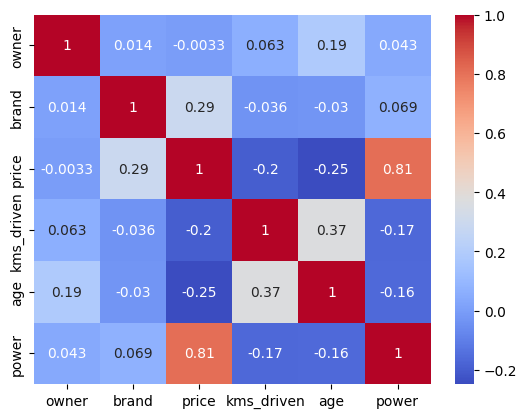

In [93]:
sns.heatmap(matrix,annot=True,cmap='coolwarm')

In [94]:
#dividing the data into independent and dependant feature
x=final_df.drop('price',axis=1)  #independent feature     
y=final_df['price']  #dependent feature

In [95]:
##dividing the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [105]:
from sklearn.linear_model import LinearRegression

# Remove rows with NaN in x_train or y_train
x_train_clean = x_train.dropna()
y_train_clean = y_train[x_train_clean.index]

lr = LinearRegression()  # creating object of linear regression
lr.fit(x_train_clean, y_train_clean)  # fitting the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [107]:
lr.score(x_train_clean, y_train_clean)  # checking the score of the model on cleaned training data y_train_clean) y_train_clean)  #  # checking checking the the score score of of the the model model on on cleaned cleaned training training data data

0.7055643295642162

In [109]:


lr.score(x_test_clean, y_test_clean)

0.7585544468871817